In [1]:
from util.visualise import *

/home/dillon/anaconda3/envs/goose/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PAPER_DIR = str(Path.home())+"/papers/24-aaai-goose/paper"

PLOT_DIR = f"{PAPER_DIR}/plots"
PLOT_DIR

'/home/dillon/papers/24-aaai-goose/paper/plots'

In [3]:
L=4
aggr="max"
H=64

CONFIGS = ["hff", "ddg-el dd", "ddg-el di", "sdg-el dd", "fdg-el dd", "ldg-el dd", "sdg-el di", "fdg-el di", "ldg-el di"]

In [4]:
FONT=22

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r'\usepackage{amsmath}',
    "font.size": FONT,
})

In [20]:
SIZE = 3
AXES_MIN = 1e1
HSPACE=0.3
WSPACE=HSPACE

METRIC_MAX={
   "expanded": 1e8,
   "cost": 1e4
}

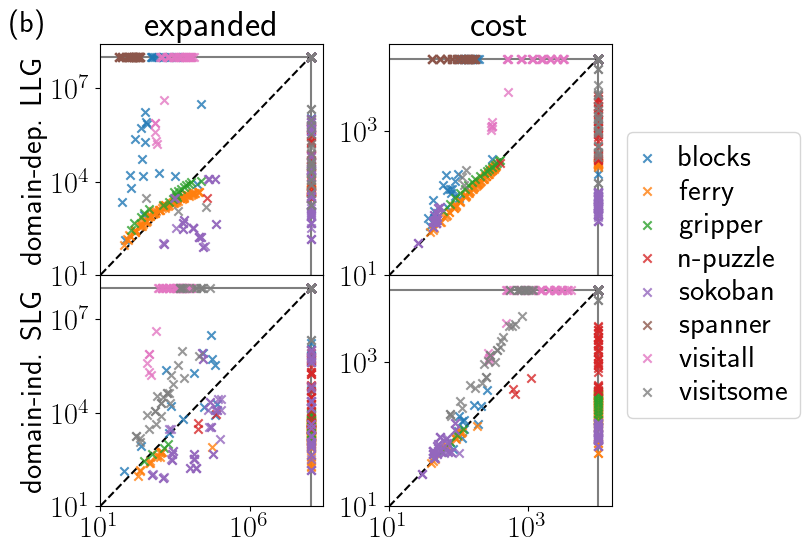

<Figure size 640x480 with 0 Axes>

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(2*(SIZE+WSPACE), 2*SIZE))

for j, metric in enumerate(["expanded", "cost"]):
  for i, goose in enumerate([("ldg-el", "dd"), ("sdg-el", "di")]):
    rep, train_type = goose
    AXES_MAX = METRIC_MAX[metric]

    # plotting
    for domain in GOOSE_DOMAINS:
        xs = []
        ys = []

        problem_pddls = os.listdir(f"../benchmarks/goose/{domain}/test")
        for problem_pddl in problem_pddls:
            problem_name = os.path.basename(problem_pddl).replace(".pddl", "")

            key = (domain, problem_name)
            
            p = 20 if train_type == "di" else 10
            ff_file = f'logs/hff/{domain}_{problem_name}_hff.log'
            goose_file = f'logs/test/{problem_name}_{train_type}_{rep}_{domain}_L{L}_H{H}_{aggr}_p{p}_r0.log'

            x = scrape_search_log(goose_file)[metric]
            y = scrape_search_log(ff_file)[metric]

            if x==-1: x = AXES_MAX
            if y==-1: y = AXES_MAX;

            xs.append(x)
            ys.append(y)

        
        axs[i,j].scatter(xs, ys, label=domain, marker='x', alpha=0.8)
    axs[i,j].plot([1, AXES_MAX], [1, AXES_MAX], linestyle='dashed', color='k', zorder=0)
    axs[i,j].plot([AXES_MAX, AXES_MAX], [1, AXES_MAX], color='k', zorder=0, alpha=0.5)
    axs[i,j].plot([1, AXES_MAX], [AXES_MAX, AXES_MAX], color='k', zorder=0, alpha=0.5)
    axs[i,j].set_xscale('log')
    axs[i,j].set_yscale('log')
    axs[i,j].set_xlim(left=AXES_MIN)
    axs[i,j].set_ylim(bottom=AXES_MIN)
    # axs[i,j].set_aspect('equal')

    if i<1:
       axs[i,j].xaxis.set_visible(False)
    # if j>0:
    #    axs[i,j].yaxis.set_visible(False)
    if j==0:
       title = "domain-dep." if train_type=="dd" else "domain-ind."
       axs[i,j].set_ylabel(title+" "+CONFIG_TO_PURE_TEX[rep])
    if i==0:
       axs[i,j].set_title(metric)

axs[0,0].text(1e-2, 6e8, r"$\text{(b)}$", fontsize=22)
plt.subplots_adjust(hspace=0, wspace=WSPACE)
# plt.legend(labelspacing=0.2, handlelength=0.5)
plt.legend(labelspacing=0.2, handlelength=0.5, loc='center left', bbox_to_anchor=(1, 1), prop={'size': FONT})
# plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/combined-exp-and-cost.pdf", bbox_inches='tight')
plt.show()
plt.clf()

In [6]:
plt.rcParams.keys()


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b